# DIO - Projeto Análise de dados com Pandas

### Aplicação das técnicas de análise exploratória de dados usando os recursos das bibliotecas Pandas e  Seaborn para apresentar  o comportamento da temperatura média de grandes cidades ao redor do mundo. Vamos verificar insights como a sazonalidade das variações de temperatura, as cidades com maior variação de temperatura ao longo dos anos e as regiões com maior ganho de temperatura

### Fonte dos dados: https://www.kaggle.com/sudalairajkumar/daily-temperature-of-major-cities

## Sumário

1. ### Importar dados e verificação de consistência

   * total de linhas, colunas e de valores inválidos
   * tipos dos dados de cada coluna

   * verificar o range de cada coluna (faixas de anos e temperaturas)

2. ### Limpeza da base de dados,  eliminando os dados inconsistentes

   * Remoção das linhas com valores de fora das faixas esperadas
   * conversão das temperaturas de ºF para ºC

3. ### Análise macro por Região

   * Evolução da temperatura média anual de cada região
   * Análise do comportamento das temperaturas das cidades brasileiras
   * quais os meses mais frios e mais quentes
   * qual a maior e a menor temperatura de cada cidade na série histórica

1. ### Importar dados e verificação de consistência

Começaremos a análise com o carregamento dos dados que se encontram no arquivo city_temperature.csv no qual iremos verificar a consistência dos dados em cada coluna, existência de campos vazios, tipo das colunas etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np

In [2]:
# Importando os dados para o workspace

raw_dataset = pd.read_csv("datasets\city_temperature.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Impressão do total de linhas e colunas e de algumas linhas do dataset para verificar o sucesso da importação

print("Dataset Shape:", raw_dataset.shape)
print(raw_dataset.sample(5))


Dataset Shape: (2906327, 8)
                                    Region      Country           State  \
2049119                      North America           US   Massachusetts   
1240028  South/Central America & Carribean    Argentina             NaN   
183947                              Africa      Senegal             NaN   
2574171                      North America           US  South Carolina   
479790                                Asia  Philippines             NaN   

                 City  Month  Day  Year  AvgTemperature  
2049119        Boston      2   10  2016            28.4  
1240028  Buenos Aires      6   16  2018            41.2  
183947          Dakar      6   14  1999            81.5  
2574171      Columbia      5   17  2017            79.7  
479790         Manila      4    1  1999            82.3  


In [4]:
# Verificação dos tipos de dados das colunas

print(raw_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB
None


In [5]:
# Verificando a existência de dados inválidos nas colunas
print("Percentual de dados inválidos por coluna:\n")
raw_dataset.isnull().sum()/raw_dataset.shape[0]*100

Percentual de dados inválidos por coluna:



Region             0.000000
Country            0.000000
State             49.925215
City               0.000000
Month              0.000000
Day                0.000000
Year               0.000000
AvgTemperature     0.000000
dtype: float64

A análise inicial mostra que a coluna State possui 49% de suas linhas vazias, portanto não será usada na análise geral.

Verifica-se também que as colunas com os dados de datas estão com o tipo int. Para auxiliar em análises futuras, concatenaremos as colunas dia, mês e ano em uma coluna extra chamada data e do tipo datetime

Por fim a coluna AvgTemperature está na escala Fahrenheit

2. ### Limpeza da base de dados, eliminando os dados inconsistentes

Começaremos a análise com o carregamento dos dados que se encontram no arquivo city_temperature.csv no qual iremos verificar a consistência dos dados em cada coluna, existência de campos vazios, tipo das colunas etc.

In [6]:
# Checagem da consistência dos dados nas colunas de datas

bad_years = raw_dataset.loc[(raw_dataset.Year < 1900) | (raw_dataset.Year > 2019)]
bad_months = raw_dataset.loc[(raw_dataset.Month < 1) | (raw_dataset.Month > 12)]
bad_days = raw_dataset.loc[(raw_dataset.Day < 1) | (raw_dataset.Day > 31)]

print("Total de linhas com dados na coluna Years fora da faixa esperada:\n", bad_years.count())
print("Total de linhas com dados na coluna Month fora da faixa esperada:\n", bad_months.count())
print("Total de linhas com dados na coluna Day fora da faixa esperada:\n", bad_days.count())


Total de linhas com dados na coluna Years fora da faixa esperada:
 Region            39250
Country           39250
State             20501
City              39250
Month             39250
Day               39250
Year              39250
AvgTemperature    39250
dtype: int64
Total de linhas com dados na coluna Month fora da faixa esperada:
 Region            0
Country           0
State             0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64
Total de linhas com dados na coluna Day fora da faixa esperada:
 Region            8
Country           8
State             0
City              8
Month             8
Day               8
Year              8
AvgTemperature    8
dtype: int64


In [7]:
# Removendo as linhas com dados inconsistentes nas colunas Year e Day

print(raw_dataset.shape)
temp_dataset = raw_dataset.drop(bad_years.index, axis=0)
print(temp_dataset.shape)
bad_days_2 = temp_dataset.loc[(temp_dataset.Day < 1) | (temp_dataset.Day > 31)]
temp_dataset_2 = temp_dataset.drop(bad_days_2.index, axis=0)
print(temp_dataset_2.shape)

(2906327, 8)
(2867077, 8)
(2867069, 8)


In [8]:
# Confirmando a remoção das linhas com dados inconsistentes

print("Total de linhas com dados na coluna Years fora da faixa esperada pós correção:\n", temp_dataset_2.loc[(temp_dataset_2.Year < 1900) | (temp_dataset_2.Year > 2019)].count())
print("Total de linhas com dados na coluna Month fora da faixa esperada pós correção:\n", temp_dataset_2.loc[(temp_dataset_2.Month < 1) | (temp_dataset_2.Month > 12)].count())
print("Total de linhas com dados na coluna Day fora da faixa esperada pós correção:\n", temp_dataset_2.loc[(temp_dataset_2.Day < 1) | (temp_dataset_2.Day > 31)].count())

Total de linhas com dados na coluna Years fora da faixa esperada pós correção:
 Region            0
Country           0
State             0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64
Total de linhas com dados na coluna Month fora da faixa esperada pós correção:
 Region            0
Country           0
State             0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64
Total de linhas com dados na coluna Day fora da faixa esperada pós correção:
 Region            0
Country           0
State             0
City              0
Month             0
Day               0
Year              0
AvgTemperature    0
dtype: int64


In [9]:
# A fonte original do dataset sinalizou que os valores de AvgTemperature preenchidos com -99 são referentes a dados indisponíveis, portanto deverão ser excluídos

dataset = temp_dataset_2.loc[temp_dataset_2.AvgTemperature > -99]
dataset.shape

(2787913, 8)

In [10]:
# Covertendo a temperatura média para Celcius 

dataset["AvgTemp_Celcius"] = dataset.AvgTemperature.apply(lambda x: (x-32)*5/9)
print(dataset.AvgTemp_Celcius)

0          17.888889
1           9.666667
2           9.333333
3           8.000000
4           8.833333
             ...    
2906322    28.000000
2906323    27.555556
2906324    29.000000
2906325    28.777778
2906326    28.666667
Name: AvgTemp_Celcius, Length: 2787913, dtype: float64


<ipython-input-10-f7a83583a692>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["AvgTemp_Celcius"] = dataset.AvgTemperature.apply(lambda x: (x-32)*5/9)


3. ### Análise macro por Região

    Evolução da temperatura média anual de cada região

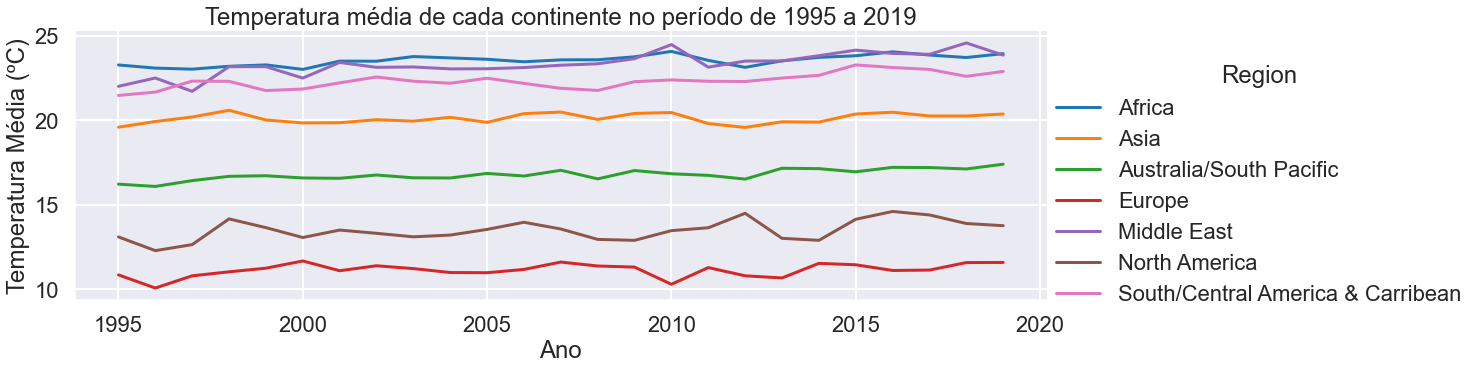

In [11]:
# Plotando a evolução anual das temperaturas de cada Região

sns.set_context("poster")
sns.set_style('darkgrid')
sns.relplot(data=dataset, x="Year", y="AvgTemp_Celcius", hue="Region", kind="line", aspect = 3, ci=None)
plt.xlabel('Ano')
plt.ylabel('Temperatura Média (ºC)')
plt.title("Temperatura média de cada continente no período de 1995 a 2019")
plt.show()

Pelo gráfico fica evidente que as regiões tropicais possuem temperaturas mais elevadas.

Vamos agora verificar mais profundamente os dados das cidades brasileiras:

In [12]:
# Selecionando os dados das cidades brasileiras para uma análise mais aprofundada

dados_br = dataset.loc[dataset.Country == 'Brazil']

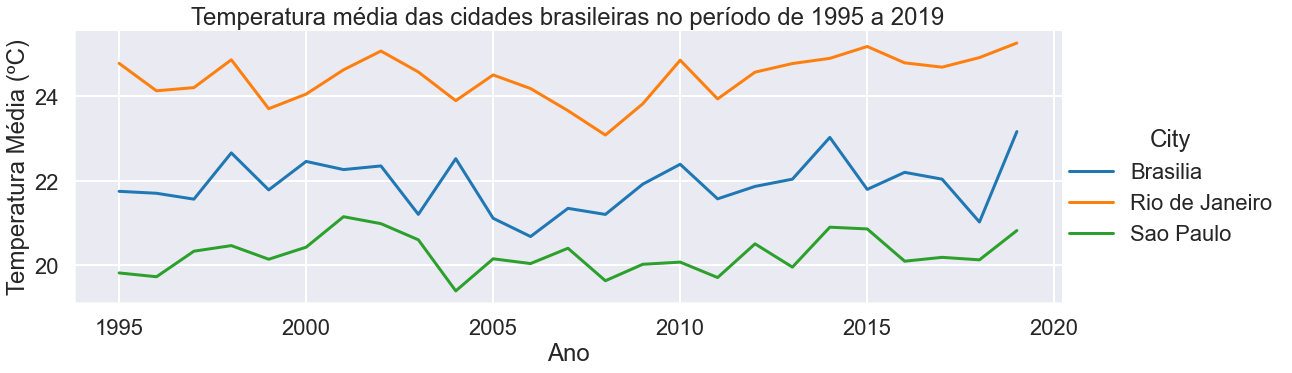

In [13]:
# Plotando o comportamento das temperaturas médias anuais das cidades brasileiras

sns.set_context("poster")
sns.set_style('darkgrid')
sns.relplot(data=dados_br, x="Year", y="AvgTemp_Celcius", hue="City", kind="line", aspect = 3, ci=None)
plt.xlabel('Ano')
plt.ylabel('Temperatura Média (ºC)')
plt.title("Temperatura média das cidades brasileiras no período de 1995 a 2019")
plt.show()

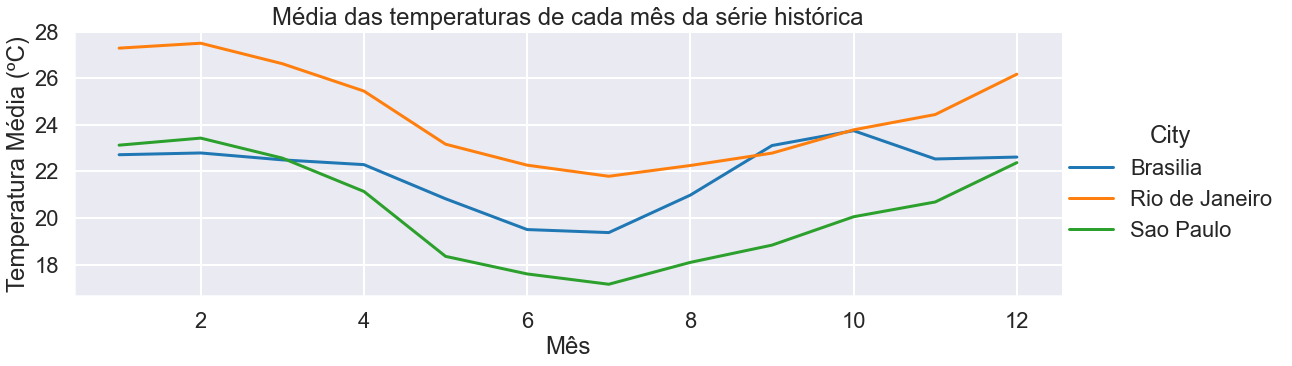

In [14]:
# Plotando a temperatura mensal média de cada cidade, ou seja, a média de cada mês para toda a série histórica

sns.set_context("poster")
sns.set_style('darkgrid')
sns.relplot(data=dados_br, x="Month", y="AvgTemp_Celcius", hue="City", kind="line", aspect = 3, ci=None)
plt.xlabel('Mês')
plt.ylabel('Temperatura Média (ºC)')
plt.title("Média das temperaturas de cada mês da série histórica")
plt.show()

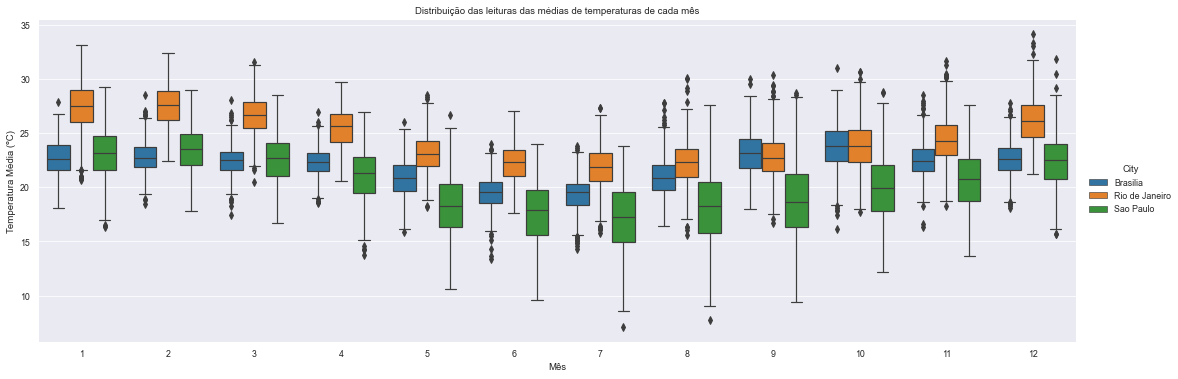

In [15]:
# Plotando a flutuabilidade das temperaturas de cada mês

sns.set_context("paper")
sns.set_style('darkgrid')
sns.catplot(data=dados_br, x="Month", y="AvgTemp_Celcius", hue="City", kind="box", aspect=3)
plt.xlabel('Mês')
plt.ylabel('Temperatura Média (ºC)')
plt.title("Distribuição das leituras das médias de temperaturas de cada mês")
plt.show()

Fica Evidente que Julho é o mês mais frio do ano nas cidadeds analisadas.
Pelos boxplots percebe-se também que a cidade de São Paulo possui a maior variabilidade de medições em cada mês
Vamos descobrir agora qual foi o dia mais frio de cada cidade e qual foi o julho mais frio desta série histórica
para isto, iremos criar uma nova coluna "data" no formato datetime dd-mm-aaaa 

In [16]:
# Criando uma coluna data no formato datetime

dados_br["data"] = pd.to_datetime(dados_br[['Day', "Month", "Year"]], format='%d-%m-%Y')

<ipython-input-16-24aaa095e735>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_br["data"] = pd.to_datetime(dados_br[['Day', "Month", "Year"]], format='%d-%m-%Y')


In [17]:
# Criando uma coluna de apoio 'mês-ano' para permitir plotarmos as médias de cada mês em cada ano
# neste caso, convertemos o tipo da coluna para string para permitir seu uso dentro pelo seaborn

dados_br["mes_ano"] = dados_br.data.dt.to_period('M').astype(str)

<ipython-input-17-d496de0c7a5c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_br["mes_ano"] = dados_br.data.dt.to_period('M').astype(str)


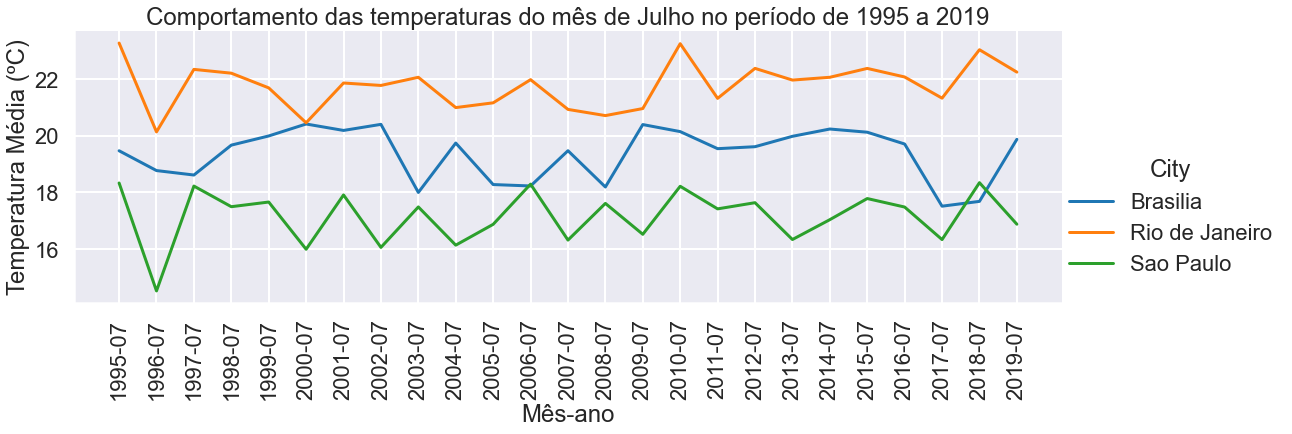

In [18]:
# Plotando agora todos os meses de Julho da série histórica para identificarmos qual foi o mais frio entre eles

sns.set_context("poster")
sns.set_style('darkgrid')
sns.relplot(data=dados_br[dados_br["Month"]==7], x="mes_ano", y="AvgTemp_Celcius", hue="City", kind="line", aspect = 3, ci=None)
plt.xlabel('Mês-ano')
plt.xticks(rotation=90)
plt.ylabel('Temperatura Média (ºC)')
plt.title("Comportamento das temperaturas do mês de Julho no período de 1995 a 2019")
plt.show()

Identifica-se quqe 1996 teve o Julho mais frio para São Paulo e para o Rio de Janeiro, já Brasília teve seu Julho mais frio em 2017

In [19]:
# Descobrindo os dias mais quentes e mais frios de cada cidade na série histórica

dados_brasilia = dados_br.loc[dados_br.City=='Brasilia']
brasilia_frio = dados_brasilia[dados_brasilia.AvgTemp_Celcius == dados_brasilia.AvgTemp_Celcius.min()]
brasilia_quente = dados_brasilia[dados_brasilia.AvgTemp_Celcius == dados_brasilia.AvgTemp_Celcius.max()]

dados_rio = dados_br.loc[dados_br.City=='Rio de Janeiro']
rio_frio = dados_rio[dados_rio.AvgTemp_Celcius == dados_rio.AvgTemp_Celcius.min()]
rio_quente = dados_rio[dados_rio.AvgTemp_Celcius == dados_rio.AvgTemp_Celcius.max()]

dados_sp = dados_br.loc[dados_br.City=='Sao Paulo']
sp_frio = dados_sp[dados_sp.AvgTemp_Celcius == dados_sp.AvgTemp_Celcius.min()]
sp_quente = dados_sp[dados_sp.AvgTemp_Celcius == dados_sp.AvgTemp_Celcius.max()]


In [20]:
# Apresentando as maiores e menores temperaturas de cada cidade

dados_br.groupby('City').agg({"AvgTemp_Celcius":[np.min, np.max]})

AvgTemp_Celcius           
                          amin       amax
City                                     
Brasilia             13.388889  30.944444
Rio de Janeiro       15.555556  34.111111
Sao Paulo             7.111111  31.777778

In [21]:
print("\nDia mais frio de Brasilia:{}, com a temperatura de : {} ºC".format(brasilia_frio.data.values, brasilia_frio.AvgTemp_Celcius.values)) 
print("\nDia mais quente de Brasilia:{}, com a temperatura de : {} ºC".format(brasilia_quente.data.values, brasilia_quente.AvgTemp_Celcius.values))
print("\nDia mais frio do Rio de Janeiro:{}, com a temperatura de : {} ºC".format(rio_frio.data.values, rio_frio.AvgTemp_Celcius.values))
print("\nDia mais quente do Rio de Janeiro:{}, com a temperatura de : {} ºC".format(rio_quente.data.values, rio_quente.AvgTemp_Celcius.values))
print("\nDia mais frio de São Paulo:{}, com a temperatura de : {} ºC".format(sp_frio.data.values, sp_frio.AvgTemp_Celcius.values))
print("\nDia mais quente de São Paulo:{}, com a temperatura de : {} ºC".format(sp_quente.data.values, sp_quente.AvgTemp_Celcius.values))


Dia mais frio de Brasilia:['2018-06-18T00:00:00.000000000'], com a temperatura de : [13.38888889] ºC

Dia mais quente de Brasilia:['2002-10-26T00:00:00.000000000'], com a temperatura de : [30.94444444] ºC

Dia mais frio do Rio de Janeiro:['1999-08-15T00:00:00.000000000'], com a temperatura de : [15.55555556] ºC

Dia mais quente do Rio de Janeiro:['1998-12-22T00:00:00.000000000'], com a temperatura de : [34.11111111] ºC

Dia mais frio de São Paulo:['2013-07-24T00:00:00.000000000'], com a temperatura de : [7.11111111] ºC

Dia mais quente de São Paulo:['1997-12-23T00:00:00.000000000'], com a temperatura de : [31.77777778] ºC


In [22]:
# Guardando a base de dados final contendo apenas as informações das cidades brasileiras

dados_br_final = dados_br.reset_index(drop=True)
dados_br_final.to_csv("datasets\\temperaturas_BSB_SP_RJ.csv")